In [69]:
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr


In [29]:
worldbank_df = pd.read_json("world_bank_data.json", lines=True)
health_df = pd.read_csv("Life_Expectancy_Data.csv")


In [30]:
health_df['Country']= health_df['Country'].str.strip()
worldbank_df['Country'] = worldbank_df['Country Name'].str.strip()

In [34]:
worldbank_df

,Country Name,Region Code,Country Code,"GDP, PPP (current international $)","Population, total",Population CGR 1960-2015,Internet users (per 100 people),Popltn Largest City % of Urban Pop,"2014 Life expectancy at birth, total (years)","Literacy rate, adult female (% of females ages 15 and above)",Exports of goods and services (% of GDP),Country
0,Aruba,MA,ABW,NaN,103889.0,0.011897,88.661227,NaN,75.451098,97.513962,NaN,Aruba
1,Andorra,EU,AND,NaN,70473.0,0.030622,96.910000,NaN,NaN,NaN,NaN,Andorra
2,Afghanistan,ME,AFG,6.291267e+10,32526562.0,0.023646,8.260000,0.533629,60.374463,23.873850,0.073278,Afghanistan
3,Angola,AF,AGO,1.844377e+11,25021974.0,0.028724,12.400000,0.499538,52.266878,60.744801,0.373074,Angola
4,Albania,EU,ALB,3.266324e+10,2889167.0,0.010702,63.252933,0.273431,77.830463,96.769691,0.271050,Albania
...,...,...,...,...,...,...,...,...,...,...,...,...
259,"Yemen, Rep.",ME,YEM,NaN,26832215.0,0.030407,25.099514,0.318983,63.818195,54.850632,NaN,"Yemen, Rep."
260,South Africa,AF,ZAF,7.235160e+11,54956920.0,0.021135,51.919116,0.263915,57.182122,93.428932,0.308972,South Africa
261,"Congo, Dem. Rep.",AF,COD,6.048226e+10,77266814.0,0.029945,3.800000,0.352896,58.659195,65.897346,0.294904,"Congo, Dem. Rep."
262,Zambia,AF,ZMB,6.245841e+10,16211767.0,0.030843,21.000000,0.328521,60.047049,80.566971,NaN,Zambia


In [36]:
health_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,Zimbabwe,2004,Developing,44.3,723,27,4.36,0.000000,68,31,...,67,7.13,65,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
1645,Zimbabwe,2003,Developing,44.5,715,26,4.06,0.000000,7,998,...,7,6.52,68,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
1646,Zimbabwe,2002,Developing,44.8,73,25,4.43,0.000000,73,304,...,73,6.53,71,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
1647,Zimbabwe,2001,Developing,45.3,686,25,1.72,0.000000,76,529,...,76,6.16,75,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [37]:
merge_df = pd.merge(worldbank_df, health_df, how='inner', on='Country')

In [39]:
merge_df.columns

Index(['Country Name', 'Region Code', 'Country Code',
       'GDP, PPP (current international $)', 'Population, total',
       'Population CGR 1960-2015', 'Internet users (per 100 people)',
       'Popltn Largest City % of Urban Pop',
       '2014 Life expectancy at birth, total (years)',
       'Literacy rate, adult female (% of females ages 15 and above)',
       'Exports of goods and services (% of GDP)', 'Country', 'Year', 'Status',
       'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [51]:
merge_df

,Country Name,Region Code,Country Code,"GDP, PPP (current international $)","Population, total",Population CGR 1960-2015,Internet users (per 100 people),Popltn Largest City % of Urban Pop,"2014 Life expectancy at birth, total (years)","Literacy rate, adult female (% of females ages 15 and above)",...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,ME,AFG,6.291267e+10,32526562.0,0.023646,8.26,0.533629,60.374463,23.873850,...,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,ME,AFG,6.291267e+10,32526562.0,0.023646,8.26,0.533629,60.374463,23.873850,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,ME,AFG,6.291267e+10,32526562.0,0.023646,8.26,0.533629,60.374463,23.873850,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,ME,AFG,6.291267e+10,32526562.0,0.023646,8.26,0.533629,60.374463,23.873850,...,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,ME,AFG,6.291267e+10,32526562.0,0.023646,8.26,0.533629,60.374463,23.873850,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,Zimbabwe,AF,ZWE,2.798488e+10,15602751.0,0.026249,16.36,0.297209,57.498317,85.285133,...,67,7.13,65,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
1645,Zimbabwe,AF,ZWE,2.798488e+10,15602751.0,0.026249,16.36,0.297209,57.498317,85.285133,...,7,6.52,68,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
1646,Zimbabwe,AF,ZWE,2.798488e+10,15602751.0,0.026249,16.36,0.297209,57.498317,85.285133,...,73,6.53,71,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
1647,Zimbabwe,AF,ZWE,2.798488e+10,15602751.0,0.026249,16.36,0.297209,57.498317,85.285133,...,76,6.16,75,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


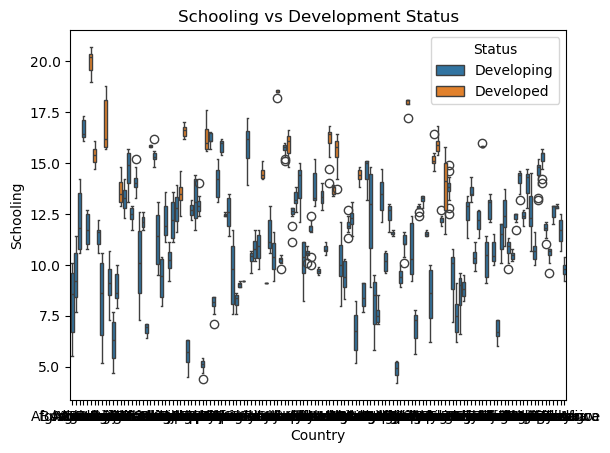

In [45]:
sns.boxplot(data=merge_df, x='Country', y= "Schooling", hue = "Status")
plt.title("Schooling vs Development Status")
plt.show()

In [92]:
merge_df.groupby('Status')['Schooling'].mean()

Status
Developed     15.573554
Developing    11.525871
Name: Schooling, dtype: float64

C:\Users\aleja\AppData\Local\Temp\ipykernel_17032\80188674.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


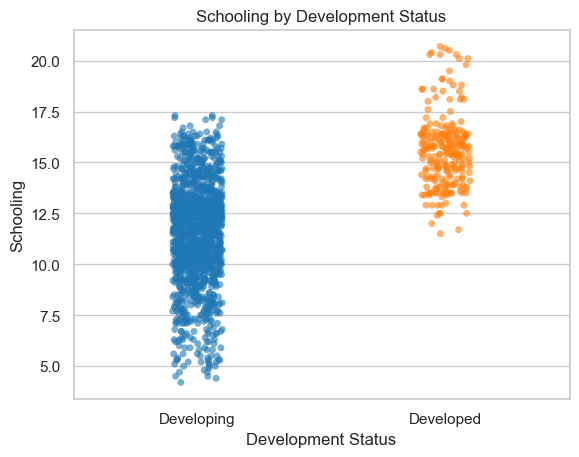

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Custom color mapping
custom_palette = {
    "Developing": "#1f77b4",  # blue
    "Developed": "#ff7f0e"    # orange
}

sns.stripplot(
    data=merge_df,
    x="Status",
    y="Schooling",
    jitter=True,
    alpha=0.6,
    palette=custom_palette
)

plt.title("Schooling by Development Status")
plt.ylabel("Schooling")
plt.xlabel("Development Status")
plt.show()



C:\Users\aleja\AppData\Local\Temp\ipykernel_17032\2448290545.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=merge_df, x="Status", palette=custom_palette)


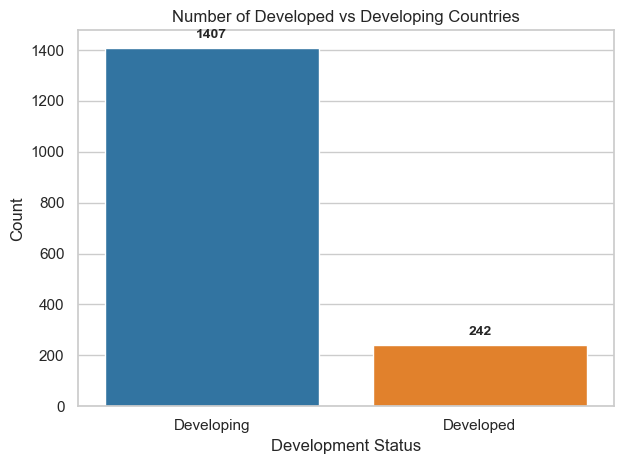

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors for each category
custom_palette = {
    "Developing": "#1f77b4",  # Blue
    "Developed": "#ff7f0e"    # Orange
}

sns.set(style="whitegrid")
ax = sns.countplot(data=merge_df, x="Status", palette=custom_palette)

# Add annotations
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', va='bottom',
                fontsize=10, fontweight='bold')

# Labels and formatting
plt.title("Number of Developed vs Developing Countries")
plt.ylabel("Count")
plt.xlabel("Development Status")
plt.tight_layout()
plt.show()



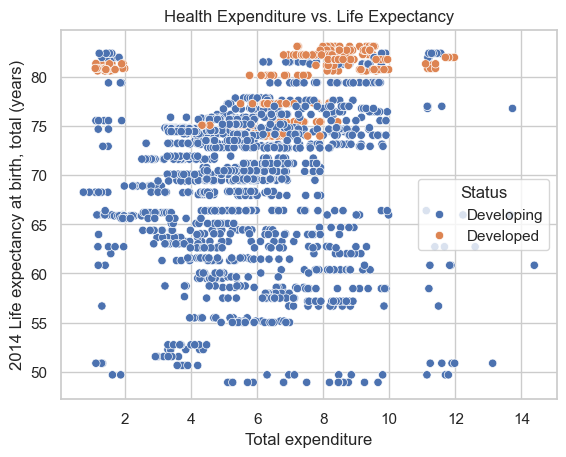

In [65]:
sns.scatterplot(data=merge_df, x="Total expenditure", y="2014 Life expectancy at birth, total (years)", hue="Status")
plt.title("Health Expenditure vs. Life Expectancy")
plt.show()


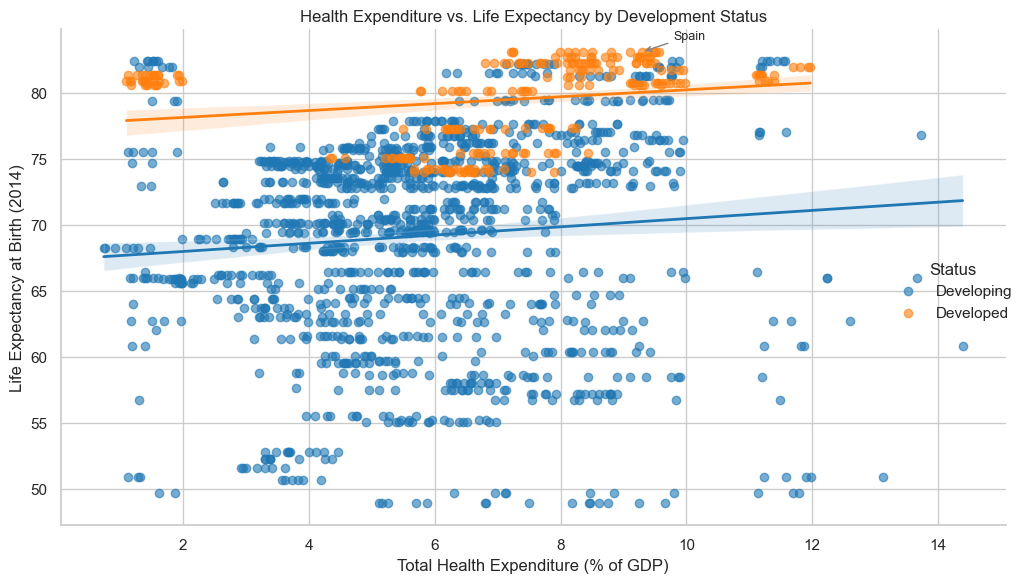

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = {"Developing": "#1f77b4", "Developed": "#ff7f0e"}

sns.lmplot(
    data=merge_df,
    x="Total expenditure",
    y="2014 Life expectancy at birth, total (years)",
    hue="Status",
    palette=palette,
    scatter_kws={"alpha": 0.6},
    line_kws={"linewidth": 2},
    height=6,
    aspect=1.5
)

plt.title("Health Expenditure vs. Life Expectancy by Development Status")
plt.xlabel("Total Health Expenditure (% of GDP)")
plt.ylabel("Life Expectancy at Birth (2014)")

top = merge_df.loc[merge_df["2014 Life expectancy at birth, total (years)"].idxmax()]
plt.annotate(
    top["Country"],
    xy=(top["Total expenditure"], top["2014 Life expectancy at birth, total (years)"]),
    xytext=(top["Total expenditure"] + 0.5, top["2014 Life expectancy at birth, total (years)"] + 1),
    arrowprops=dict(arrowstyle="->", color='gray'),
    fontsize=9
)

plt.tight_layout()
plt.show()


In [72]:

gdp = merge_df['GDP']
life_expectancy = merge_df['2014 Life expectancy at birth, total (years)']
corr, _ = pearsonr(gdp.dropna(), life_expectancy.dropna())
print("Correlation between GDP and Life Expectancy:", corr)

Correlation between GDP and Life Expectancy: 0.4309276009261406


In [73]:
merge_df['Income Level'] = pd.qcut(merge_df['GDP, PPP (current international $)'], q=2, labels=['Low Income', 'High Income'])

In [77]:
income_counts = merge_df['Income Level'].value_counts()
print(income_counts)

Income Level
Low Income     768
High Income    740
Name: count, dtype: int64


In [78]:
gdp_status_counts = pd.crosstab(merge_df['Status'], merge_df['Income Level'])
print(gdp_status_counts)

Income Level  Low Income  High Income
Status                               
Developed             60          170
Developing           708          570


In [79]:
gdp_status_percent = pd.crosstab(merge_df['Status'], merge_df['Income Level'], normalize='index') * 100
print(gdp_status_percent.round(2))


Income Level  Low Income  High Income
Status                               
Developed          26.09        73.91
Developing         55.40        44.60


In [87]:
merge_df['Healthcare Index'] = merge_df[['Polio', 'Measles ', 'Diphtheria ']].mean(axis=1)


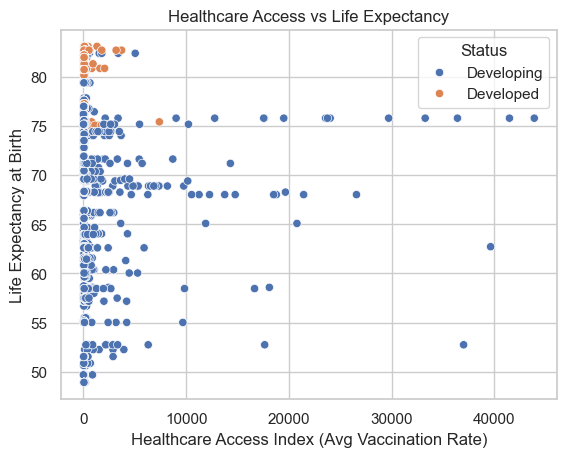

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    data=merge_df,
    x='Healthcare Index',
    y='2014 Life expectancy at birth, total (years)',
    hue='Status'  # or use 'Income Level'
)
plt.title('Healthcare Access vs Life Expectancy')
plt.xlabel('Healthcare Access Index (Avg Vaccination Rate)')
plt.ylabel('Life Expectancy at Birth')
plt.show()


In [89]:
correlation = merge_df[['Healthcare Index', '2014 Life expectancy at birth, total (years)']].corr()
print(correlation)


                                              Healthcare Index  \
Healthcare Index                                      1.000000   
2014 Life expectancy at birth, total (years)         -0.047792   

                                              2014 Life expectancy at birth, total (years)  
Healthcare Index                                                                 -0.047792  
2014 Life expectancy at birth, total (years)                                      1.000000  


In [90]:
grouped = merge_df.groupby('Status')['Healthcare Index'].mean()
print(grouped)

Status
Developed     221.356749
Developing    896.483298
Name: Healthcare Index, dtype: float64


In [91]:
import statsmodels.formula.api as smf

model = smf.ols('Q("2014 Life expectancy at birth, total (years)") ~ Q("Healthcare Index") + Q("Income Level") + Q("Status")', data=merge_df).fit()
print(model.summary())


                                            OLS Regression Results                                           
Dep. Variable:     Q("2014 Life expectancy at birth, total (years)")   R-squared:                       0.268
Model:                                                           OLS   Adj. R-squared:                  0.267
Method:                                                Least Squares   F-statistic:                     183.8
Date:                                               Wed, 23 Apr 2025   Prob (F-statistic):          1.62e-101
Time:                                                       18:14:49   Log-Likelihood:                -5037.0
No. Observations:                                               1508   AIC:                         1.008e+04
Df Residuals:                                                   1504   BIC:                         1.010e+04
Df Model:                                                          3                                         
Covariance